In [1]:
from datascience import *
%matplotlib inline
path_data = '../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pylab as pl
import numpy as np

# 14.1 Properties of the Mean (평균의 특성)

평균은 몇 가지 속성을 지닌다.

- 집합의 요소일 필요 없다.
- 집합의 모든 요소가 정수일 지라도, 정수일 필요가 없다.
- 집합의 최솟값과 최댓값 사이에 존재한다.
- 두 극단 사이의 중앙값일 필요는 없으며, 요소 중 절반 이상이 평균 이상이라는 것은 일반적으로 사실이 아니다.
- 집합의 수의 지정된 단위로 측정되었다면, 평균 역시 해당 단위를 갖는다.

### 평균은 Smoother

평균은 **균등화** 또는 **매끄러운 연산** 으로 생각할 수 있다.

또한 집단이 1과 0으로 구성되어있을 때, 집단의 합은 1의 개수이고, 집단의 평균은 1의 비율이다.

In [2]:
zero_one = make_array(1, 1, 1, 0)
sum(zero_one)

3

In [3]:
np.mean(zero_one)

0.75

In [4]:
np.mean(make_array(True, True, True, False))

0.75

### 평균과 히스토그램

[2, 3, 3, 9]의 평균은 4.25이며, 이는 데이터의 중간이 아니다.

그렇다면 평균은 무엇을 측정하는 것일까?

$$\begin{align*}
\text{mean} ~ &=~ 4.25 \\ \\
&=~ \frac{2 + 3 + 3 + 9}{4} \\ \\
&=~ 2 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{1}{4} ~~ + ~~ 9 \cdot \frac{1}{4} \\ \\
&=~ 2 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{2}{4} ~~ + ~~ 9 \cdot \frac{1}{4} \\ \\
&=~ 2 \cdot 0.25 ~~ + ~~ 3 \cdot 0.5 ~~ + ~~ 9 \cdot 0.25
\end{align*}$$

마지막 수식에서 알 수 있듯이, 각 요소가 집단에 나타나는 횟수의 비율로 가중된다.

즉 집단의 평균은 집단의 요소 수가 아니라, 고유한 값과 그 비율에 의존한다.
-> 따라서 두 집단의 분포가 같으면 평균도 같다.

In [7]:
not_symmetric = make_array(2, 3, 3, 9)

In [6]:
same_distribution = make_array(2, 2, 3, 3, 3, 3, 9, 9)
np.mean(same_distribution)

4.25

In [8]:
np.mean(not_symmetric) == np.mean(same_distribution)

True

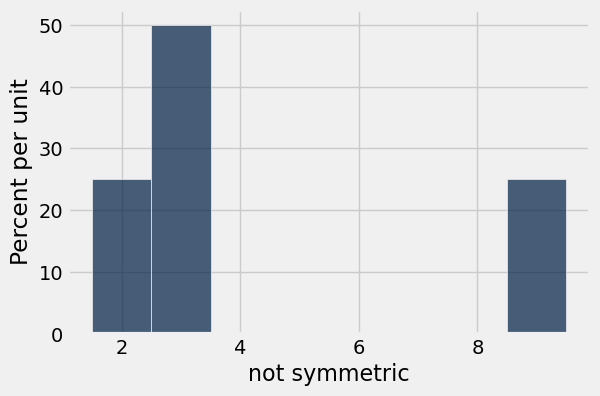

In [9]:
t1 = Table().with_columns('not symmetric', not_symmetric)
t1.hist(bins=np.arange(1.5, 9.6, 1))
plots.show()

평균은 히스토그램에서 무게 중심이다.

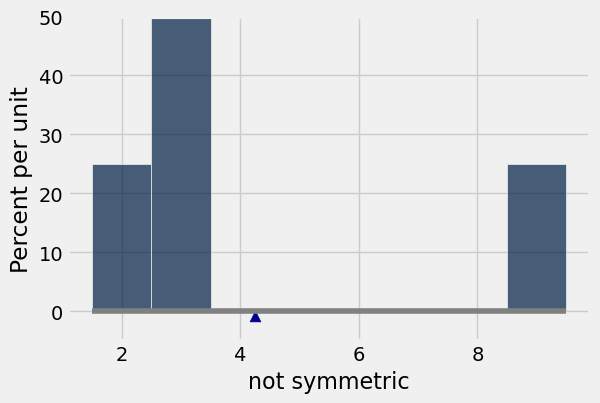

In [10]:
mean_ns = np.mean(not_symmetric)
t1.hist(bins=np.arange(1.5, 9.6, 1))
plots.scatter(mean_ns, -0.009, marker='^', color='darkblue', s=60)
plots.plot([1.5, 9.5], [0, 0], color='grey')
plots.ylim(-0.05, 0.5)
plots.show()

### 평균과 중앙값

시험에서 한 학생의 점수가 평균 이하라면, 그 학생은 반에서 하위권에 속하는 것인가?

해당 질문에 대한 답은, 항상 그렇지는 않다.

In [11]:
symmetric = make_array(2, 3, 3, 4)

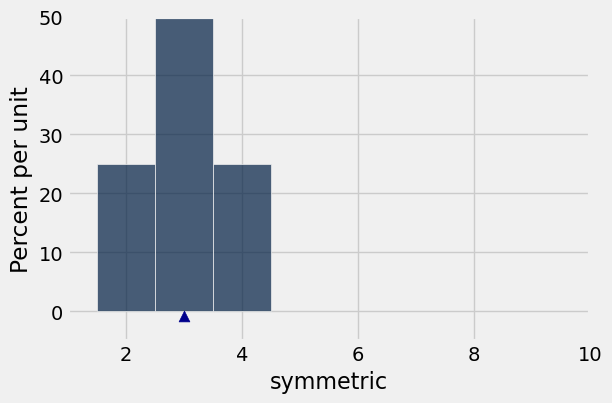

In [12]:
t2 = Table().with_columns('symmetric', symmetric)
mean_s = np.mean(symmetric)

t2.hist(bins=np.arange(1.5, 4.6, 1))
plots.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plots.xlim(1, 10)
plots.ylim(-0.05, 0.5)
plots.show()

일반적으로, 대칭 분포에 대해서는 평균값과 중앙값이 동일하다.

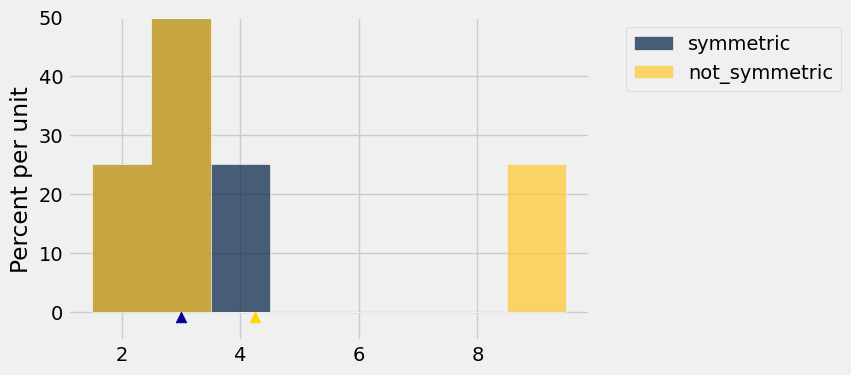

In [13]:
t3 = t2.with_column(
        'not_symmetric', not_symmetric
)

t3.hist(bins=np.arange(1.5, 9.6, 1))
plots.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plots.scatter(mean_ns, -0.009, marker='^', color='gold', s=60)
plots.ylim(-0.05, 0.5)
plots.show()

두 히스토그램에서, 파란색 분포의 중앙값과 평균값은 3이다. 하지만 노란색 분포의 중앙값은 3이지만, 평균값은 4.25이다.

# 14.2 Variability (변동성)

평균은 히스토그램의 균형을 맞추는 위치를 알려준다. 대부분의 히스토그램에서 값들은 평균으로 부터 퍼져있는 형태이다. 평균에서 얼마나 멀리 떨어져 있을 수 있을까? 이 질문에 답하기 위해 평균에 대한 변동성을 측정하는 척도를 개발할 것이다.

In [14]:
any_numbers = make_array(1, 2, 2, 10)

In [15]:
# Step 1. The average.

mean = np.mean(any_numbers)
mean

3.75

In [16]:
# Step 2. The deviations from average.

deviations = any_numbers - mean
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Average', deviations
        )
calculation_steps

Value,Deviation from Average
1,-2.75
2,-1.75
2,-1.75
10,6.25


In [17]:
sum(deviations)

0.0

In [18]:
np.mean(deviations)

0.0

In [19]:
# Step 3. The squared deviations from average

squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value,Deviation from Average,Squared Deviations from Average
1,-2.75,7.5625
2,-1.75,3.0625
2,-1.75,3.0625
10,6.25,39.0625


In [20]:
# Step 4. Variance = the mean squared deviation from average

variance = np.mean(squared_deviations)
variance

13.1875

In [21]:
# Step 5.
# Standard Deviation:    root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1

sd = variance ** 0.5
sd

3.6314597615834874

### 표준 편차

sd로 표기. 해당 값은 평균으로 부터 얼마나 멀리 떨어져있는지를 나타내는 수치이다.

In [24]:
std = np.std(any_numbers)
std

3.6314597615834874

In [25]:
nba13 = Table.read_table(path_data + 'nba2013.csv')
nba13

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


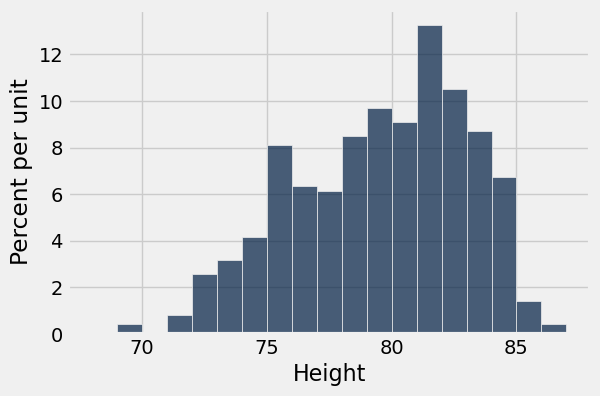

In [26]:
nba13.select('Height').hist(bins=np.arange(68, 88, 1))
plots.show()

In [27]:
mean_height = np.mean(nba13.column('Height'))
mean_height

79.065346534653472

nba 선수들의 평균 키는 약 79인치이다.

In [28]:
sd_height = np.std(nba13.column('Height'))
sd_height

3.4505971830275546

표준편차는 3.45이다.

In [29]:
nba13.sort('Height', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Alex Len,Center,85,255,20


In [30]:
87 - mean_height

7.9346534653465284

가장 큰 키를 가진 선수와 평균의 차이는 약 8인치 정도이다.

In [31]:
(87 - mean_height)/sd_height

2.2995015194397923

즉 가장 큰 선수의 키는 평균보다 2.3SD 만큼 크다.

In [32]:
nba13.sort('Height').show(3)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24
Nate Robinson,Guard,69,180,29
John Lucas III,Guard,71,157,30


In [33]:
(69 - mean_height)/sd_height

-2.9169868288775844

가장 작은 선수의 키는 평균보다 2.9SD 작다

우리는 키가 가장 큰 선수와 작은 선수가 평균으로 부터 몇 SD 떨어져있는지를 구할 수 있었다. 이것이 SD가 흩어짐정도를 측정하는데 유용한 이유이다. 히스토그램의 모양에 관계없이 평균과 SD를 이용하면 히스토그램이 수직선에서 어디에 위치하는지에 대해 알 수 있다.

### SD에 의한 분포를 측정하는 첫번째 이유

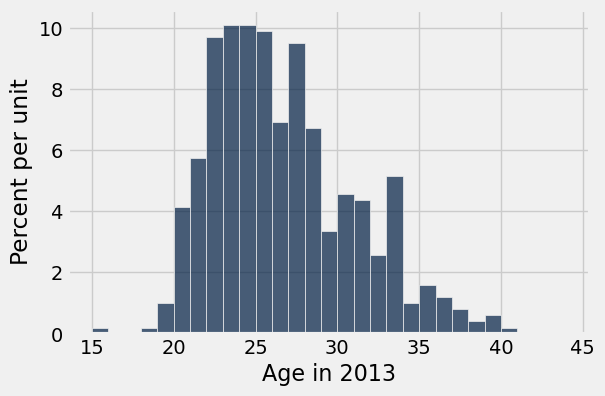

In [36]:
nba13.select('Age in 2013').hist(bins=np.arange(15, 45, 1))
plots.show()

In [37]:
ages = nba13.column('Age in 2013')
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.3212004417203067)

평균 연령은 26세, SD는 약 4.3세이다.

In [38]:
nba13.sort('Age in 2013', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Juwan Howard,Forward,81,250,40
Steve Nash,Guard,75,178,39
Derek Fisher,Guard,73,210,39


In [39]:
(40 - mean_age)/sd_age

3.1958482778922357

가장 나이가 많은 선수의 나이는 40세이고, 이는 평균으로부터 12세, 약 3SD만큼 떨어져 있다.

대부분의 항목은 평균에서 2~3 SD를 넘기지 않는다.

- $\pm$ 2SD 구간은 75% 구간
- $\pm$ 3SD 구간은 89% 구간
- $\pm$ 4.5SD 구간은 95% 구간으로 정의한다.

### 표준 단위

$$
z ~=~ \frac{\text{value }-\text{ average}}{\text{SD}}
$$

In [40]:
def standard_units(numbers_array):
    "Convert any array of numbers to standard units."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)    

### 예시


In [41]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united = united.with_column(
    'Delay (Standard Units)', standard_units(united.column('Delay'))
)
united

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/1/15,73,HNL,257,6.08766
6/1/15,217,EWR,28,0.287279
6/1/15,237,STL,-3,-0.497924
6/1/15,250,SAN,0,-0.421937
6/1/15,267,PHL,64,1.19913
6/1/15,273,SEA,-6,-0.573912
6/1/15,278,SEA,-8,-0.62457
6/1/15,292,EWR,12,-0.117987
6/1/15,300,HNL,20,0.0846461
6/1/15,317,IND,-10,-0.675228


In [42]:
united.sort('Delay', descending=True)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979


표준 단위로 나타내었을 때, 14같이 엄청 큰 단위도 존재한다. 하지만 이는 매우 작은 값이다.

In [43]:
within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows/united.num_rows

0.9790235081374322

$\pm$ 3SD 범위에 있는 값이 약 98%가 존재한다.

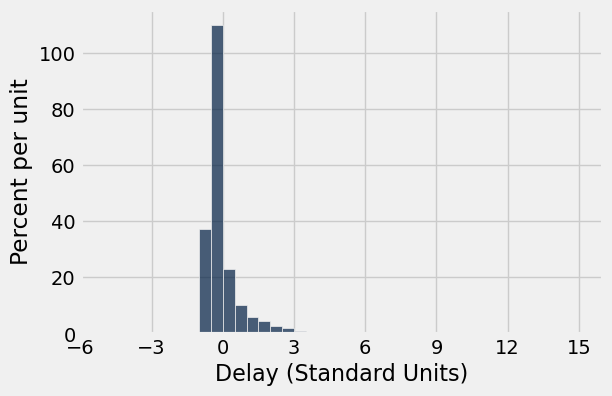

In [44]:
united.hist('Delay (Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plots.xticks(np.arange(-6, 17, 3))
plots.show()

히스토그램으로 나타내면 다음과 같다. $\pm$ 3SD 를 벗어나는 값은 2%내외이며 그림에서는 보이지도 않는 작은 값이다.

# 14.3 SD와 정규 곡선

평균은 히스토그램의 균형점이다. 하지만 SD는 일반적으로 식별하기 쉽지 않다.

하지만 SD를 평균 만큼이나 명확하게 식별할 수 있는 분포의 형태가 하나 있다. 바로 종모양 분포이다.

In [45]:
baby = Table.read_table(path_data + 'baby.csv')

In [46]:
heights = baby.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

64.0

In [47]:
sd_height = np.round(np.std(heights), 1)
sd_height

2.5

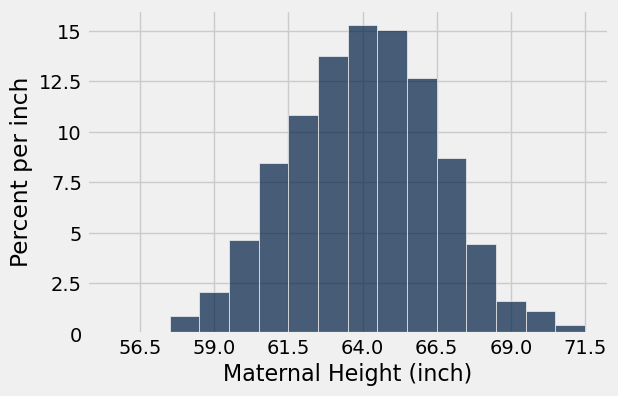

In [48]:
baby.hist('Maternal Height', bins=np.arange(55.5, 72.5, 1), unit='inch')
positions = np.arange(-3, 3.1, 1)*sd_height + mean_height
plots.xticks(positions)
plots.show()

### 표준 정규 곡선

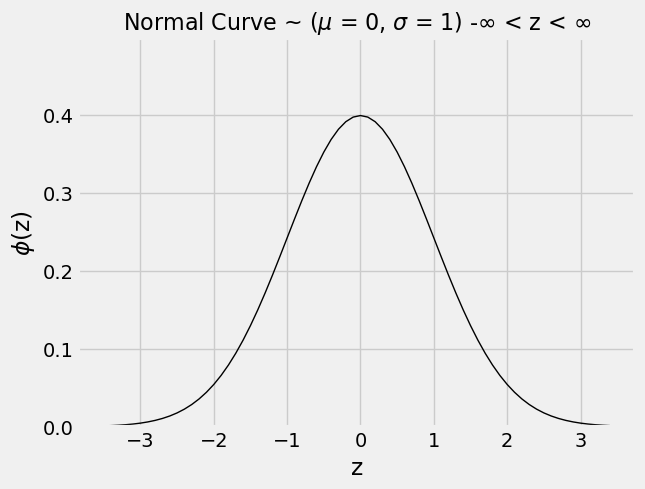

In [49]:
# The standard normal curve

plot_normal_cdf()

### 표준 정규 cdf

누적 분포 함수

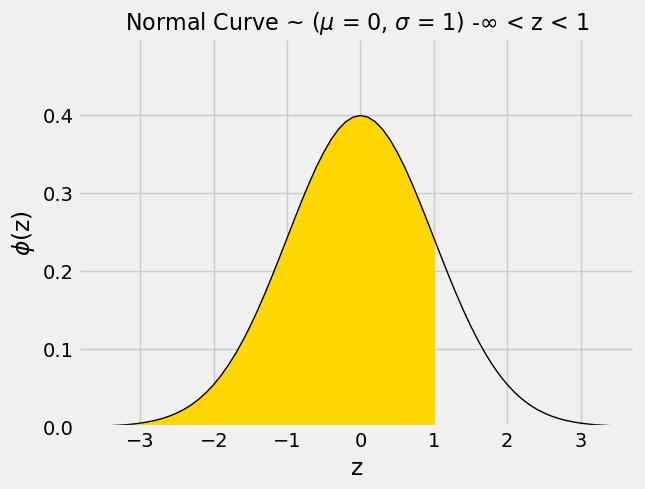

In [52]:
from scipy import stats

# Area under the standard normal curve, below 1

plot_normal_cdf(1)

In [53]:
stats.norm.cdf(1)

0.84134474606854293

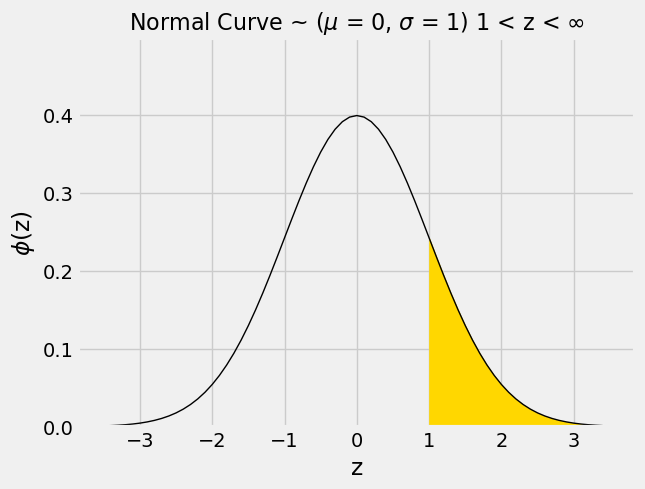

In [54]:
# Area under the standard normal curve, above 1

plot_normal_cdf(lbound=1)

In [55]:
1 - stats.norm.cdf(1)

0.15865525393145707

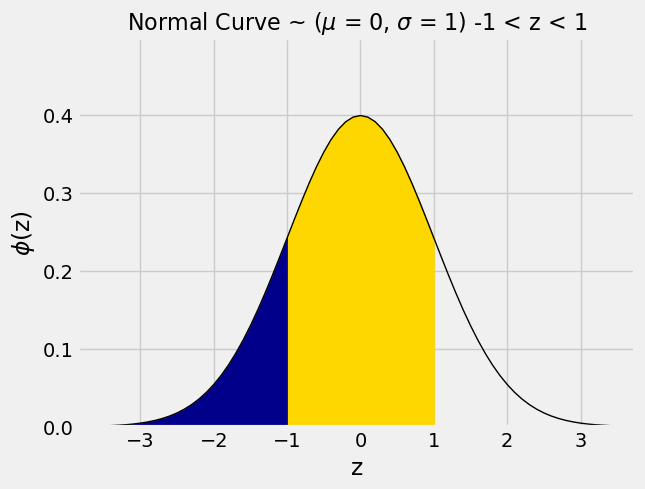

In [56]:
# Area under the standard normal curve, between -1 and 1

plot_normal_cdf(1, lbound=-1)

In [57]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

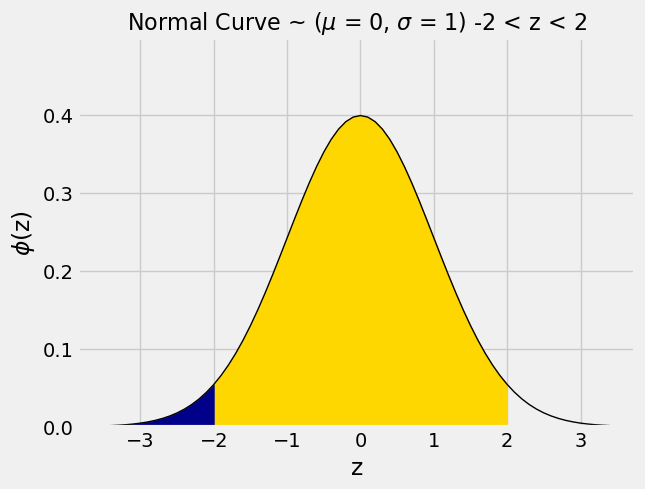

In [58]:
# Area under the standard normal curve, between -2 and 2

plot_normal_cdf(2, lbound=-2)

In [59]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.95449973610364158

위를 통해 다음과 같은 사실을 알 수 있다.

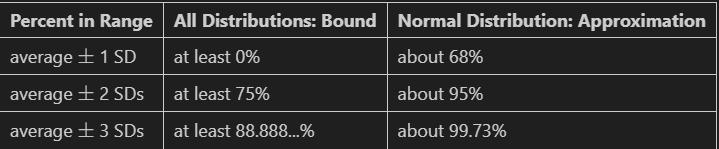

# 14.4 Central Limit Theorem (중심 극한 정리)

In [61]:
colors = Table.read_table(path_data + 'roulette_wheel.csv').column('Color')
pockets = make_array('0','00')
for i in np.arange(1, 37):
    pockets = np.append(pockets, str(i)) 

wheel = Table().with_columns(
    'Pocket', pockets,
    'Color', colors
)

wheel

Pocket,Color
0,green
00,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


In [62]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

In [63]:
red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )
red

Pocket,Color,Winnings: Red
0,green,-1
00,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


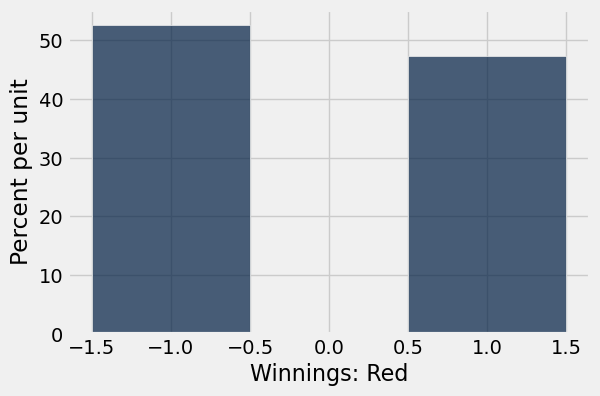

In [64]:
red.select('Winnings: Red').hist(bins=np.arange(-1.5, 1.6, 1))
plots.show()

In [65]:
num_bets = 400
repetitions = 10000

net_gain_red = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)


results = Table().with_column(
    'Net Gain on Red', net_gain_red
    )

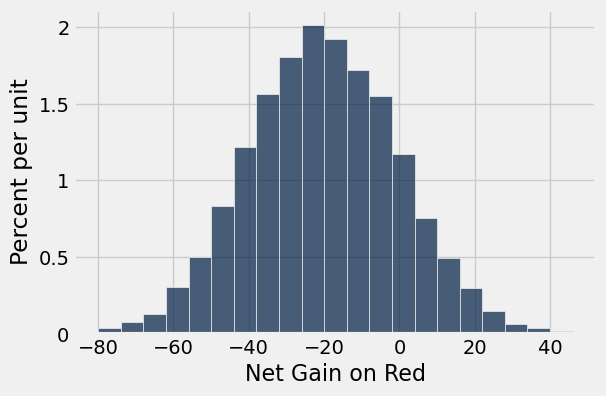

In [66]:
results.hist(bins=np.arange(-80, 50, 6))
plots.show()

In [67]:
average_per_bet = 1*(18/38) + (-1)*(20/38)
average_per_bet

-0.05263157894736842

In [68]:
400 * average_per_bet

-21.052631578947366

In [69]:
np.mean(results.column(0))

-21.204599999999999

In [70]:
np.std(results.column(0))

19.811101404010834

### 평균 비행 지연

In [71]:
united = Table.read_table(path_data + 'united_summer2015.csv')

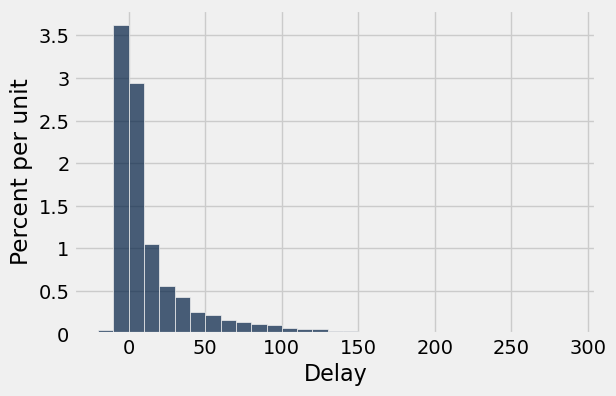

In [72]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))
plots.show()

In [73]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

평균에 비해 SD가 너무 크다. 영향을 크게 미칠 것이다.

In [74]:
delay = united.select('Delay')

In [75]:
np.mean(delay.sample(400).column('Delay'))

15.0275

400개를 샘픓한 평균은 15이다.

In [76]:
sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column(
    'Sample Mean', means
)

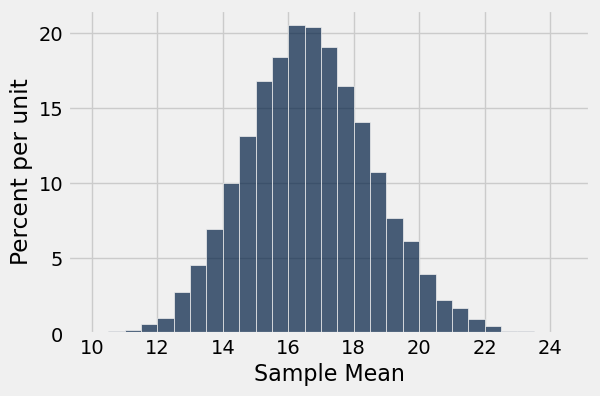

In [77]:
results.hist(bins=np.arange(10, 25, 0.5))
plots.show()

왜곡된 분포에서 벗어나 종모양 분포가 나온것을 확인할 수 있다.

=> 이러한 이유는 **중심 극한 정리** 때문이다.

In [78]:
colors = make_array('Purple', 'Purple', 'Purple', 'White')

model = Table().with_column('Color', colors)

model

Color
Purple
Purple
Purple
White


보라색이 75%, 흰색이 25% 확률로 선택된다.

In [79]:
props = make_array()

num_plants = 200
repetitions = 10000

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props = np.append(props, new_prop)
    
results = Table().with_column('Sample Proportion: 200', props)

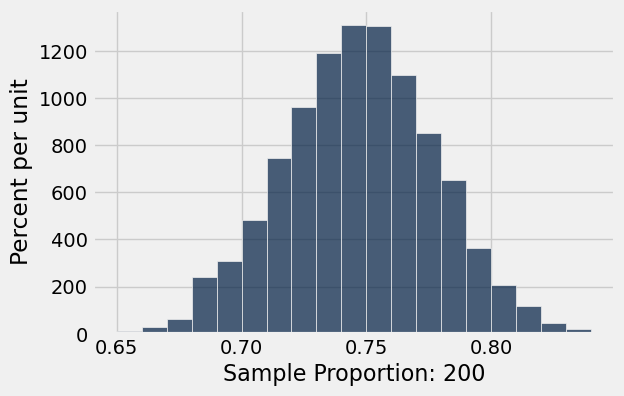

In [82]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))
plots.show()

200번 샘플링하여 각각의 분포에서 보라색의 확률을 구한것에 대한 분포를 나타내었을 때, 0.75를 중심으로 정규 분포 형태를 띄는것을 알 수 있다.

In [83]:
props2 = make_array()

num_plants = 800

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props2 = np.append(props2, new_prop)
    
results = results.with_column('Sample Proportion: 800', props2)

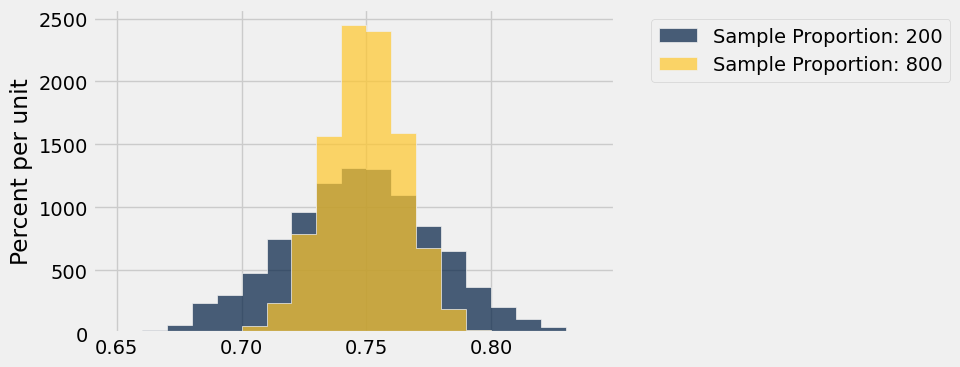

In [85]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))
plots.show()

표본의 크기가 늘어남에 따라 0.75에 더욱 집중되어 있다.

# 14.5 표본 평균의 변동성

중심 극한 정리에 따르면, 큰 무작위 표본의 평균 확률은 대략 정규 분포이다. 종 곡선은 모집단 평균의 중심을 두고 있다. 모집단 평균으로 부터의 편차는 어느 한 쪽에서 대략 대칭이다. 확률 이론에 따르면 표본 평균은 모집단 평균의 편향되지 않은 추정치이다.

In [86]:
united = Table.read_table(path_data + 'united_summer2015.csv')
delay = united.select('Delay')

In [87]:
pop_mean = np.mean(delay.column('Delay'))
pop_mean

16.658155515370705

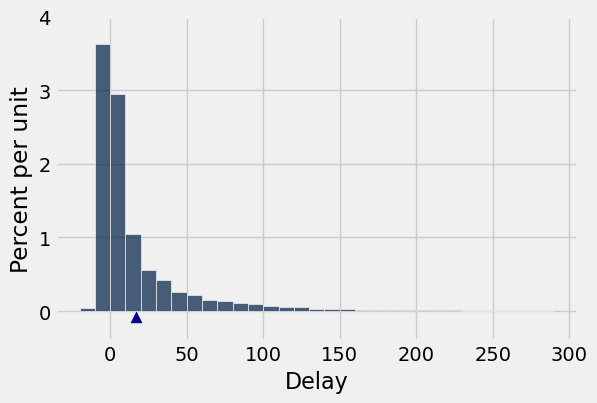

In [88]:
delay.hist(bins=np.arange(-20, 300, 10))
plots.scatter(pop_mean, -0.0008, marker='^', color='darkblue', s=60)
plots.ylim(-0.004, 0.04)
plots.show()

In [89]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample.column(label))
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.645034
Population SD: 39.4801998516
SD of sample means: 3.95456781948


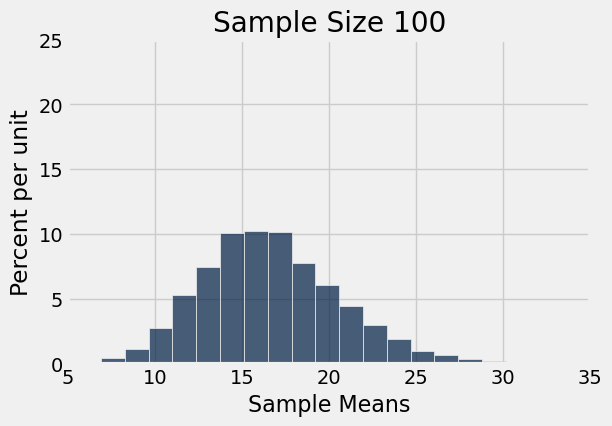

In [90]:
simulate_sample_mean(delay, 'Delay', 100, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25)
plots.show()

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.637302
Population SD: 39.4801998516
SD of sample means: 1.97096379363


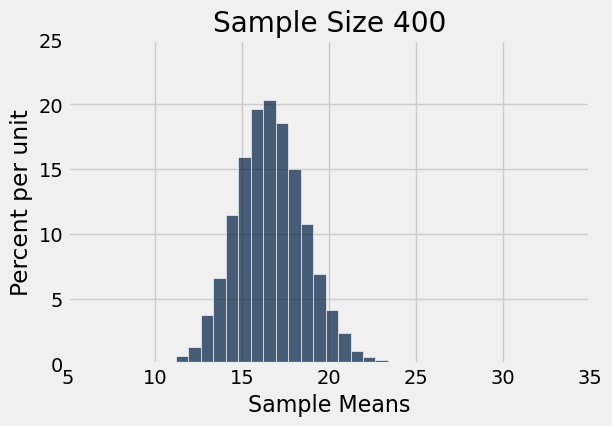

In [91]:
simulate_sample_mean(delay, 'Delay', 400, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25)
plots.show()

Sample size:  625
Population mean: 16.6581555154
Average of sample means:  16.6630656
Population SD: 39.4801998516
SD of sample means: 1.57980618699


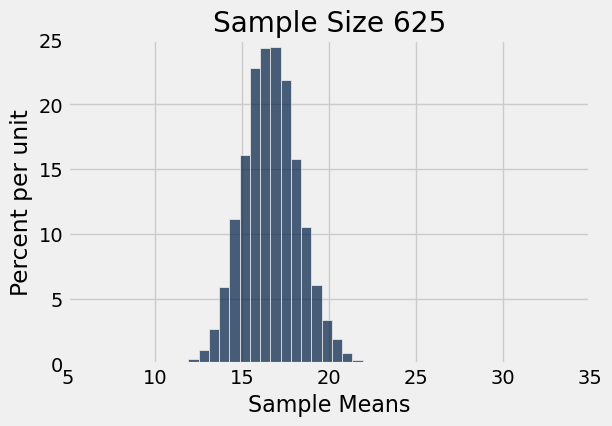

In [92]:
simulate_sample_mean(delay, 'Delay', 625, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25)
plots.show()

중심 극한 정리가 실제로 작용하는 것을 볼 수 있다.

In [93]:
pop_sd = np.std(delay.column('Delay'))
pop_sd

39.480199851609314

In [94]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)

sd_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(delay.sample(n).column('Delay')))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_means,
    'pop_sd/sqrt(n)', pop_sd/np.sqrt(sample_sizes)
)